# Practice 1 : The design of the probe layout


probeinterface is a tool to handle the design of the probe layout, that will be used by all modern spike sorting algorithms. Indeed, since spike sorters are making use of the spatial positions of the channels to reconstruct the extracellular waveforms elicited during the spike of a single cell, it is crucial to know where channels are located. If you are luky, then such a probe layout is already avalaible, and you can use it instantaneously. But most of the time, depending of your recording setup/probe, you need to create one. In such a file, you must specify what are your channels, where they are in space, and what is the mapping between your recording file and the recording setup.

For this pratice you will need to have a look at

  * [probeinterface documentation](https://probeinterface.readthedocs.io/en/main/)
  * [probeinterface examples](https://probeinterface.readthedocs.io/en/main/examples/index.html)


In [1]:
%matplotlib inline
# %matplotlib widget

In [2]:
import probeinterface as pi
from probeinterface.plotting import plot_probe

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


## Using already implemented probes (such as cambridge neurotech)

In [3]:
manufacturer = 'cambridgeneurotech'
probe_name = 'ASSY-236-H6'

probe = pi.get_probe(manufacturer, probe_name)
print(probe)

cambridgeneurotech - ASSY-236-H6 - 64ch - 2shanks


(<matplotlib.collections.PolyCollection at 0x7f04419baee0>,
 <matplotlib.collections.PolyCollection at 0x7f043f8a4580>)

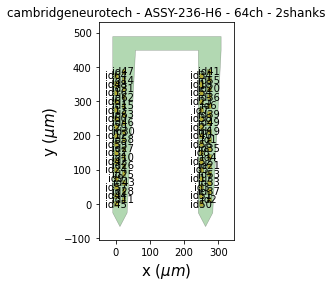

In [4]:
plot_probe(probe, with_contact_id=True)

## Let's implement the neuronexus A1x32-Poly2-10mm-50s-177 probe manually

  * https://www.neuronexus.com/files/catalog/2021-Probe-Catalog.pdf



<img src="./neuronexus_A1xPoly32.png" width="400"/>



## Step 1 : constructing a probe from channel positions

using the `Probe()` object, some methods such as
  * `Probe.set_contacts()`
  * `Probe.set_contact_ids()`
and using the file **'A1x32-Poly2-10mm-50s-177.csv'** let's try to construct the probe as an exercice.

Once this is done, then plot it with `plot_probe()` and use the `with_contact_id=True` option


## Step 1 : alternative method

using the `Probe()` object, some methods such as
  * `pi.Probe.from_dataframe()`


## Step 2 : setting the contour of your probe

As you can see, you need to specify a contour for your probe. Contour can be set :
  * automatiocally with dummy shape `probe.create_auto_shape()`
  * or manuualy with `probe.set_planar_contour'()`


Here is the polygon shape of our probe, that can be reused later: 

```
contour_polygon =  [[-25, 800],
                   [-11, 0],
                   [43.3/2, -75.],
                   [54.3, 0],
                   [68.3, 800]]
```


## Step 3 : saving "probe unwired" into a json file

Using the function `write_probeinterface()`, you can save the probe to a file. Inspect the file and have a look to the way this is constructed.

## Step 4 : wiring to device channel (aka pathway or mapping)

Now lets do the "wiring" aka channel mapping. Lets connect our probe to RHD2132 INtan headstage with the H32 connector.

You can get some help by looking at https://intantech.com/RHD_headstages.html?tabSelect=RHD32ch&yPos=0

And also, note that the mapping depend on the connector of the probe, see this https://www.neuronexus.com/files/probemapping/32-channel/H32-Maps.pdf


<img src="./Intan_RDH2132_overview.png" width="400"/>
<img src="./Intan_RDH2132_connector_pineout.png" width="400"/>
<img src="./H32_neuronexus_connector_omnetics.png" width="400"/>


Probeinterface have 2 ways to make the mapping:

 1. Manually with : `probe.set_device_channel_indices()`
 2. Automatically with `probe.wiring_to_device()`
 
  
Use the `with_contact_id=True` and `with_device_index=True` option for plor_probe. Check with dataframe the mapping


## Step 5 : saving the "probe wired" into json

Now that the probe has been wired, let's save it into a file and inspect the resulting file